# Text Classification - Naive Bayes
Steps:
- Importing and preprocessing data
- Building the model: Multinomial Naive Bayes

## 1. Importing and preprocessing data

In [98]:
import pandas as pd

In [99]:
df = pd.read_csv('data/movie_review_train.csv')
df.head()

,class,text
0,Pos,a common complaint amongst film critics is ...
1,Pos,whew this film oozes energy the kind of b...
2,Pos,steven spielberg s amistad which is bas...
3,Pos,he has spent his entire life in an awful litt...
4,Pos,being that it is a foreign language film with...


In [100]:
df['lable'] = df['class'].map({'Pos': 1, 'Neg': 0})
df = df.drop('class', axis=1)
df

,text,lable
0,a common complaint amongst film critics is ...,1
1,whew this film oozes energy the kind of b...,1
2,steven spielberg s amistad which is bas...,1
3,he has spent his entire life in an awful litt...,1
4,being that it is a foreign language film with...,1
...,...,...
1595,if anything stigmata should be taken as...,0
1596,john boorman s zardoz is a goofy cinemati...,0
1597,the kids in the hall are an acquired taste ...,0
1598,there was a time when john carpenter was a gr...,0


In [101]:
x = df['text']
y = df['lable']

In [102]:
# vectorizing the sentences; removing stop words
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words='english')

In [103]:
vect.fit(x)

CountVectorizer(stop_words='english')

In [104]:
len(vect.vocabulary_.keys())

35858

In [105]:
new_dict = CountVectorizer(stop_words='english', min_df=0.03, max_df=0.8)

In [106]:
new_dict.fit(x)

CountVectorizer(max_df=0.8, min_df=0.03, stop_words='english')

In [107]:
len(new_dict.vocabulary_.keys())

1643

In [108]:
# transforming the train and test datasets
x_train_transformed = new_dict.transform(x)

In [109]:
x_train_transformed.getnnz()

217396

## 2. Building and Evaluating the Model

In [110]:
df_test = pd.read_csv('data/movie_review_test.csv')
df_test.head()

,class,text
0,Pos,films adapted from comic books have had plent...
1,Pos,every now and then a movie comes along from a...
2,Pos,you ve got mail works alot better than it des...
3,Pos,jaws is a rare film that grabs your atte...
4,Pos,moviemaking is a lot like being the general m...


In [111]:
df_test['lable'] = df_test['class'].map({'Pos': 1, 'Neg': 0})
df_test = df_test.drop('class', axis=1)
df_test

,text,lable
0,films adapted from comic books have had plent...,1
1,every now and then a movie comes along from a...,1
2,you ve got mail works alot better than it des...,1
3,jaws is a rare film that grabs your atte...,1
4,moviemaking is a lot like being the general m...,1
...,...,...
395,one of the first films of 1999 is this mtv pi...,0
396,susan granger s review of america s sweethe...,0
397,susan granger s review of jeepers creepers ...,0
398,this independent film written and directed by...,0


In [112]:
x_test = df_test['text']
y_test = df_test['lable']

In [113]:
x_test_transformed = new_dict.transform(x_test)

In [114]:
x_test_transformed

<400x1643 sparse matrix of type '<class 'numpy.int64'>'
	with 51663 stored elements in Compressed Sparse Row format>

In [115]:
# training the NB model and making predictions
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()

# fit
bnb.fit(x_train_transformed,y)

# predict class
y_pred_class = bnb.predict(x_test_transformed)

# predict probabilities
y_pred_proba = bnb.predict_proba(x_test_transformed)

In [119]:
bnb

BernoulliNB()

### Model Evaluation

In [120]:
# printing the overall accuracy
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.79

In [121]:
# confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)
# help(metrics.confusion_matrix)

array([[177,  23],
       [ 61, 139]])

In [122]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

[[177  23]
 [ 61 139]]


In [123]:
FP

23

In [124]:
sensitivity = TP / float(FN + TP)
print("sensitivity",sensitivity)

sensitivity 0.695


In [126]:
specificity = TN / float(TN + FP)
print("specificity",specificity)

specificity 0.885


In [127]:
precision = TP / float(TP + FP)
print("precision",precision)
print(metrics.precision_score(y_test, y_pred_class))

precision 0.8580246913580247
0.8580246913580247


In [128]:
# creating an ROC curve
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

In [129]:
# area under the curve
print (roc_auc)

0.87275


In [130]:
# matrix of thresholds, tpr, fpr
pd.DataFrame({'Threshold': thresholds, 
              'TPR': true_positive_rate, 
              'FPR':false_positive_rate
             })

,Threshold,TPR,FPR
0,2.000000e+00,0.000,0.000
1,1.000000e+00,0.015,0.000
2,9.999991e-01,0.185,0.000
3,9.999990e-01,0.185,0.005
4,9.999926e-01,0.225,0.005
...,...,...,...
119,1.487517e-05,0.980,0.695
120,1.293598e-05,0.990,0.695
121,1.125936e-06,0.990,0.850
122,9.377541e-07,1.000,0.850


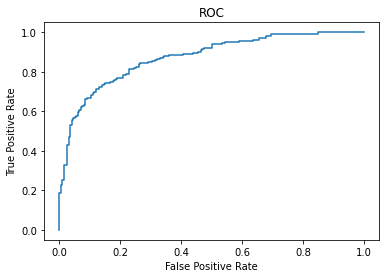

In [131]:
# plotting the ROC curve
%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)